In [2]:
import pandas as pd
import numpy as np

In [3]:
amazon=pd.read_csv("Seventh Generation Toilet Tissue Recycled.csv")

In [4]:
amazon[:5]

Unnamed: 0                                       review_title  \
0           0                           I have a name suggestion   
1           1                      Soft, affordable and recycled   
2           2                                 WHAT HAVE I DONE?!   
3           3                        Over glue causes shredding!   
4           4  It's recycled but it's pretty soft and pretty ...   

                                         review_text  star_rating  \
0  They should call this John Wayne toilet paper,...            1   
1  This is the best toilet paper I've found. I ha...            5   
2  Let me start off with saying that I love Seven...            2   
3  Alright. Judge me if you will... I am a TP sno...            2   
4  It's TP. Not much to say about it. It's recycl...            5   

   is_verified_purchase  num_found_helpful  
0                  True                  1  
1                  True                  3  
2                  True                  2  
3                  True                  1  
4                  True                  2

In [5]:
a=amazon[:100]['review_text']

In [6]:
len(a)

100

In [20]:
import re

In [21]:
import nltk



In [22]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


False

In [19]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [17]:
def preprocess_text(text):
    # Remove HTML tags (if any)
    text = re.sub(r"<.*?>", "", text)
    
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    tokens = [token for token in tokens if token.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    # print(filtered_tokens)
    # # Lemmatization
    # lemmatizer = WordNetLemmatizer()
    # lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # # Join the tokens back into a single string
    # processed_text = " ".join(filtered_tokens)

    
    return filtered_tokens

In [12]:
processed_series = a.apply(preprocess_text)

In [13]:
processed_series

0     [call, john, wayne, toilet, paper, rough, toug...
1     [best, toilet, paper, found, buy, recycled, pa...
2     [let, start, saying, love, seventh, generation...
3     [alright, judge, tp, snob, prefer, cottonelle,...
4     [tp, much, say, recycled, pretty, soft, pretty...
                            ...                        
95    [get, soft, strong, version, pictured, package...
96    [really, love, quality, one, thick, leave, beh...
97    [good, product, makes, feel, good, know, buyin...
98                        [soft, supple, cleans, great]
99    [great, company, products, toilet, paper, pret...
Name: review_text, Length: 100, dtype: object

In [14]:
from gensim.models import Word2Vec

In [15]:
# Train Word2Vec model
model = Word2Vec(processed_series, vector_size=100, window=5, min_count=1)

# Get word embeddings
word_embeddings = model.wv

In [16]:
word_embeddings.index_to_key

['paper',
 'toilet',
 'recycled',
 'like',
 'soft',
 'great',
 'good',
 'one',
 'use',
 'product',
 'buy',
 'better',
 'products',
 'tp',
 'brand',
 'get',
 'quality',
 'roll',
 'tissue',
 'environment',
 'seventh',
 'buying',
 'really',
 'little',
 'rolls',
 'last',
 'love',
 'thin',
 'generation',
 'would',
 'much',
 'go',
 'happy',
 'made',
 'going',
 'company',
 'time',
 'free',
 'price',
 'brands',
 'long',
 'bought',
 'using',
 'pretty',
 'rough',
 'big',
 'absorbent',
 'family',
 'deal',
 'something',
 'way',
 'charmin',
 'done',
 'tried',
 'friendly',
 'lot',
 'environmentally',
 'start',
 'bad',
 'say',
 'looking',
 'bath',
 'seems',
 'amazon',
 'well',
 'job',
 'sustainable',
 'softness',
 'trees',
 'still',
 'enough',
 'used',
 'getting',
 'definitely',
 'green',
 'years',
 'local',
 'lasts',
 'could',
 'different',
 'wish',
 'purchase',
 'find',
 'reviews',
 'hate',
 'either',
 'also',
 'softest',
 'feel',
 'make',
 'got',
 'body',
 'ca',
 'home',
 'even',
 'less',
 'perfec

In [17]:
# Obtain word vectors
word_vectors = [word_embeddings[word] for word in word_embeddings.index_to_key]

In [18]:
word_embeddings.index_to_key

['paper',
 'toilet',
 'recycled',
 'like',
 'soft',
 'great',
 'good',
 'one',
 'use',
 'product',
 'buy',
 'better',
 'products',
 'tp',
 'brand',
 'get',
 'quality',
 'roll',
 'tissue',
 'environment',
 'seventh',
 'buying',
 'really',
 'little',
 'rolls',
 'last',
 'love',
 'thin',
 'generation',
 'would',
 'much',
 'go',
 'happy',
 'made',
 'going',
 'company',
 'time',
 'free',
 'price',
 'brands',
 'long',
 'bought',
 'using',
 'pretty',
 'rough',
 'big',
 'absorbent',
 'family',
 'deal',
 'something',
 'way',
 'charmin',
 'done',
 'tried',
 'friendly',
 'lot',
 'environmentally',
 'start',
 'bad',
 'say',
 'looking',
 'bath',
 'seems',
 'amazon',
 'well',
 'job',
 'sustainable',
 'softness',
 'trees',
 'still',
 'enough',
 'used',
 'getting',
 'definitely',
 'green',
 'years',
 'local',
 'lasts',
 'could',
 'different',
 'wish',
 'purchase',
 'find',
 'reviews',
 'hate',
 'either',
 'also',
 'softest',
 'feel',
 'make',
 'got',
 'body',
 'ca',
 'home',
 'even',
 'less',
 'perfec

In [19]:
word_vectors

[array([-9.9431502e-04,  1.3286562e-03,  5.3003104e-03,  9.3673114e-03,
        -8.9678364e-03, -9.3386453e-03,  6.9390219e-03,  1.2121411e-02,
        -5.8761127e-03, -4.5189988e-03,  6.8455623e-03, -3.0094115e-03,
        -4.2808140e-03,  6.5297922e-03, -4.2307177e-03, -3.0777340e-03,
         3.0577981e-03, -6.7102746e-04, -9.1672624e-03, -1.1948978e-02,
         7.6572425e-03,  5.8177360e-03,  7.3770890e-03,  4.7742616e-04,
         5.6439890e-03, -3.5319352e-03, -1.8576758e-03,  4.2019919e-03,
        -8.2526226e-03, -3.3535247e-03, -6.3005653e-03, -4.0177690e-04,
         1.0083074e-02, -8.1343791e-03, -3.5937126e-03,  1.7826130e-04,
         7.7054622e-03, -7.1503809e-03, -5.0165242e-04, -7.6386179e-03,
        -9.7104535e-03,  4.4240979e-03, -8.9047225e-03, -4.4260472e-03,
         1.6964149e-03, -1.3275136e-03, -8.6265504e-03,  9.9779749e-03,
         6.0288082e-03,  9.5229503e-03, -7.5510512e-03,  3.5604036e-03,
        -3.8855898e-03,  7.3133589e-04,  7.8538703e-03, -3.93259

In [36]:
from sklearn.cluster import KMeans

In [21]:
# Apply K-means clustering
num_clusters = 3  # Number of aspects/topics
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(word_vectors)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [22]:
# Get cluster labels
labels = kmeans.labels_

In [23]:
# Assign aspects to words based on cluster labels
word_aspects = {word: label for word, label in zip(word_embeddings.index_to_key, labels)}

In [24]:
# Print word aspects
dict_aspects = {}
for word, aspect in word_aspects.items():
    print(f"Word: {word}")
    print(f"Aspect: {aspect}")
    print()
    dict_aspects[word] = aspect

Word: paper
Aspect: 0

Word: toilet
Aspect: 2

Word: recycled
Aspect: 1

Word: like
Aspect: 2

Word: soft
Aspect: 0

Word: great
Aspect: 0

Word: good
Aspect: 0

Word: one
Aspect: 0

Word: use
Aspect: 2

Word: product
Aspect: 2

Word: buy
Aspect: 1

Word: better
Aspect: 1

Word: products
Aspect: 1

Word: tp
Aspect: 1

Word: brand
Aspect: 0

Word: get
Aspect: 0

Word: quality
Aspect: 1

Word: roll
Aspect: 1

Word: tissue
Aspect: 1

Word: environment
Aspect: 1

Word: seventh
Aspect: 2

Word: buying
Aspect: 0

Word: really
Aspect: 1

Word: little
Aspect: 1

Word: rolls
Aspect: 1

Word: last
Aspect: 1

Word: love
Aspect: 2

Word: thin
Aspect: 0

Word: generation
Aspect: 0

Word: would
Aspect: 1

Word: much
Aspect: 0

Word: go
Aspect: 1

Word: happy
Aspect: 1

Word: made
Aspect: 1

Word: going
Aspect: 0

Word: company
Aspect: 2

Word: time
Aspect: 0

Word: free
Aspect: 0

Word: price
Aspect: 2

Word: brands
Aspect: 0

Word: long
Aspect: 0

Word: bought
Aspect: 1

Word: using
Aspect: 2

Word

In [2]:
import pandas as pd

In [5]:
p1=pd.read_excel("Amazon Reviews Validation Data.xlsx")

In [7]:
#convert xlsx to csv
p1.to_csv("Amazon Reviews Validation Data_1.csv", index=False)

In [8]:
# amazon=pd.read_csv("Eco_Friendly_Products_Test_Full.xlsx - Sheet1.csv")
amazon=pd.read_csv("Amazon Reviews Validation Data_1.csv")

In [9]:
amazon

Reviews        Aspect
0           The settings are perfect for all hair types  Adaptability
1                                 with lots of settings  Adaptability
2                              heating element has died    Durability
3           Also, the diffuser does not stay on at all.   Ease of Use
4     and it won't stay on it at all. Just flys off....   Ease of Use
...                                                 ...           ...
1176                            top no longer stays on.   Performance
1177  unfortunately one of the lids does not fit at all   Performance
1178  cheap enough that if my husband loses one, we ...         Price
1179                                   economical price         Price
1180  Also, there is no way to seal the drinking hol...        Safety

[1181 rows x 2 columns]

In [11]:
# a=amazon["Review"]
a=amazon["Reviews"]

In [12]:
q=amazon["Aspect"]

In [13]:
all_values = q.str.split(',').explode()

In [14]:
unique_values = all_values.unique()

In [15]:
len_aspect=len(unique_values)

In [16]:
len_aspect

12

In [75]:
processed_series = a.apply(preprocess_text)

In [76]:
from gensim.models import Word2Vec

In [77]:
# Train Word2Vec model
model = Word2Vec(processed_series, vector_size=100, window=5, min_count=1)

# Get word embeddings
word_embeddings = model.wv

In [78]:
word_embeddings.index_to_key

['easy',
 'great',
 'well',
 'use',
 'good',
 'like',
 'quality',
 'durable',
 'work',
 'one',
 'really',
 'also',
 'price',
 'time',
 'clean',
 'nice',
 'get',
 'product',
 'easily',
 'sturdy',
 'comfortable',
 'works',
 'water',
 'fit',
 'wash',
 'enough',
 'even',
 'bags',
 'strong',
 'would',
 'makes',
 'light',
 'hot',
 'hold',
 'size',
 'keep',
 'colors',
 'heavy',
 'bag',
 'keeps',
 'color',
 'beautiful',
 'quickly',
 'made',
 'super',
 'little',
 'need',
 'fast',
 'iron',
 'paper',
 'still',
 'shower',
 'put',
 'bottle',
 'cold',
 'stay',
 'way',
 'excellent',
 'day',
 'love',
 'soft',
 'much',
 'looks',
 'thing',
 'months',
 'perfect',
 'broke',
 'long',
 'perfectly',
 'seems',
 'used',
 'carry',
 'handle',
 'pretty',
 'getting',
 'temperature',
 'weight',
 'fits',
 'fan',
 'tea',
 'set',
 'first',
 'clock',
 'smell',
 'quite',
 'two',
 'absorbent',
 'difficult',
 'working',
 'hand',
 'far',
 'strap',
 'never',
 'ever',
 'battery',
 'wish',
 'find',
 'coffee',
 'keyboard',
 't

In [79]:
# Obtain word vectors
word_vectors = [word_embeddings[word] for word in word_embeddings.index_to_key]

In [28]:
!pip3 install scikit-fuzzy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [29]:
!pip3 install scikit-learn scikit-fuzzy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [31]:
import numpy as np

In [32]:
vectors = np.array(word_vectors)

In [33]:
import skfuzzy as fuzz
import numpy as np

# Step 3: Apply Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    vectors.T,  # transpose data because cmeans assumes each column is a data point
    c=len_aspect,  # number of clusters
    m=2,  # fuzziness parameter
    error=0.005,
    maxiter=1000
)

# Assigning clusters based on maximum membership principle
cluster_membership = np.argmax(u, axis=0)
print("Cluster Membership:", cluster_membership)




Cluster Membership: [ 0  5  0 ...  7 10  9]


In [34]:
len(cluster_membership)

1715

In [37]:
# Apply K-means clustering
num_clusters = 12  # Number of aspects/topics
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(word_vectors)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=12)

In [38]:
# Get cluster labels
labels = kmeans.labels_

In [39]:
# Assign aspects to words based on cluster labels
word_aspects = {word: label for word, label in zip(word_embeddings.index_to_key, labels)}

In [40]:
# Print word aspects
dict_aspects = {}
for word, aspect in word_aspects.items():
    print(f"Word: {word}")
    print(f"Aspect: {aspect}")
    print()
    dict_aspects[word] = aspect

Word: easy
Aspect: 0

Word: great
Aspect: 5

Word: well
Aspect: 7

Word: use
Aspect: 9

Word: good
Aspect: 6

Word: like
Aspect: 1

Word: quality
Aspect: 7

Word: durable
Aspect: 3

Word: work
Aspect: 2

Word: one
Aspect: 1

Word: really
Aspect: 10

Word: also
Aspect: 6

Word: price
Aspect: 5

Word: time
Aspect: 2

Word: clean
Aspect: 5

Word: nice
Aspect: 1

Word: get
Aspect: 7

Word: product
Aspect: 1

Word: easily
Aspect: 4

Word: sturdy
Aspect: 9

Word: comfortable
Aspect: 6

Word: works
Aspect: 6

Word: water
Aspect: 1

Word: fit
Aspect: 1

Word: wash
Aspect: 7

Word: enough
Aspect: 0

Word: even
Aspect: 7

Word: bags
Aspect: 5

Word: strong
Aspect: 9

Word: would
Aspect: 7

Word: makes
Aspect: 1

Word: light
Aspect: 1

Word: hot
Aspect: 5

Word: hold
Aspect: 8

Word: size
Aspect: 1

Word: keep
Aspect: 1

Word: colors
Aspect: 11

Word: heavy
Aspect: 5

Word: bag
Aspect: 7

Word: keeps
Aspect: 6

Word: color
Aspect: 1

Word: beautiful
Aspect: 7

Word: quickly
Aspect: 4

Word: made


In [41]:
labels

array([ 0,  5,  7, ...,  6, 10,  8], dtype=int32)

In [42]:
from sklearn.preprocessing import normalize
word_vectors = normalize(word_vectors) 

In [43]:
import plotly.graph_objects as go
import pandas as pd
from sklearn.manifold import TSNE

# Assuming word_vectors, labels, and processed_series are already defined

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a DataFrame for the data
df = pd.DataFrame({
    'x': word_vectors_2d[:, 0],
    'y': word_vectors_2d[:, 1],
    'label': [word for word, _ in word_aspects.items()],
    'cluster': labels
})

# Create the scatter plot with plotly
fig = go.Figure()

# Add data points
for i, label in enumerate(np.unique(labels)):
    cluster_df = df[df['cluster'] == label]
    fig.add_trace(go.Scatter(x=cluster_df['x'], y=cluster_df['y'],
                             mode='markers+text',
                             marker=dict(size=6),
                             hovertext=cluster_df['label'],
                             hoverinfo="text",  # Display custom text on hover,
                             name=f'Cluster {label+1}'))

# Update layout
fig.update_layout(title='Word Clusters',
                  xaxis_title='t-SNE 1',
                  yaxis_title='t-SNE 2')

fig.show()

In [44]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(word_vectors)
new_values = PCA_model.transform(word_vectors)

In [45]:
import plotly.graph_objects as go
import pandas as pd

# Assuming word_vectors, labels, and processed_series are already defined

import plotly.express as px
import pandas as pd

# Create a DataFrame for the data
df = pd.DataFrame({
    'x': new_values[:, 0],
    'y': new_values[:, 1],
    'label': [word for word, _ in word_aspects.items()],
    'cluster': labels
})

# Create the scatter plot with plotly
fig = px.scatter(df, x='x', y='y', hover_name='label')
# Create the scatter plot with plotly
fig = go.Figure()

# Add data points
for i, label in enumerate(np.unique(labels)):
    cluster_df = df[df['cluster'] == label]
    fig.add_trace(go.Scatter(x=cluster_df['x'], y=cluster_df['y'],
                             mode='markers+text',
                             marker=dict(size=6),
                             hovertext=cluster_df['label'],
                             hoverinfo="text",  # Display custom text on hover,
                             name=f'Cluster {label+1}'))

# Update layout
fig.update_layout(title='Word Clusters',
                  xaxis_title='PCA 1',
                  yaxis_title='PCA 2')

fig.show()

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

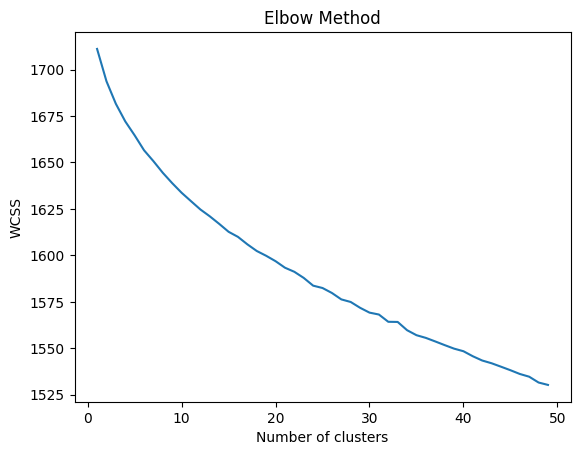

In [47]:
wcss=[]
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(word_vectors)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(1, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:

centroids = word_vectors[np.random.choice(word_vectors.shape[0], num_clusters, replace=False), :]

num_clusters = 12

# K-means clustering with cosine similarity
for i in range(100):  # 100 iterations; can also use convergence criteria
    # Compute cosine similarity
    similarity = np.dot(word_vectors, centroids.T)
    
    # Assign labels based on maximum similarity
    labels = np.argmax(similarity, axis=1)
    
    # Recompute centroids
    for j in range(num_clusters):
        centroids[j] = np.mean(word_vectors[labels == j], axis=0)

# Final cluster assignments
print("Cluster labels:", labels)


Cluster labels: [8 6 3 ... 4 5 5]


In [49]:
from sklearn.manifold import TSNE

IndexError: index 1715 is out of bounds for axis 0 with size 1715

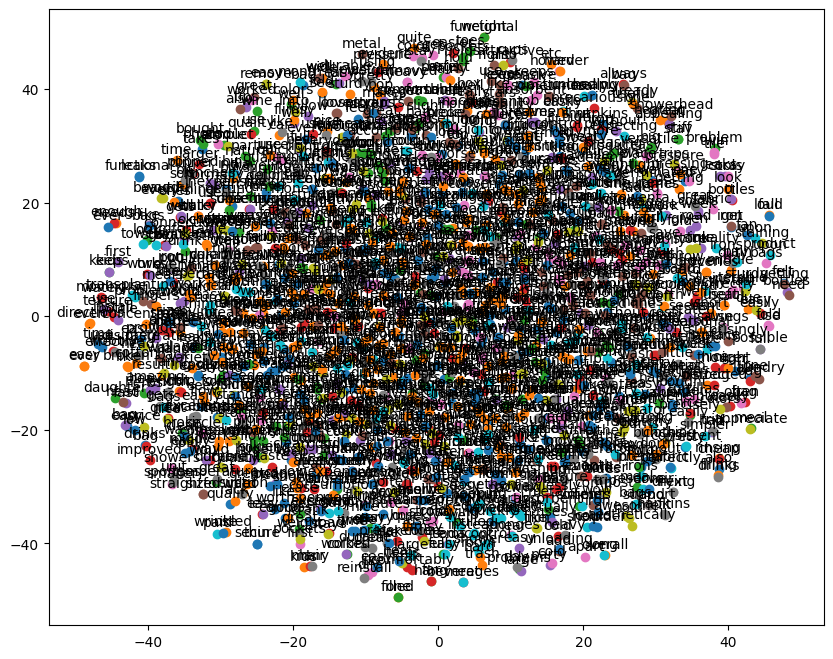

In [50]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
for i, label in enumerate(np.unique(labels)):
    plt.scatter(word_vectors_2d[labels == label, 0], word_vectors_2d[labels == label, 1], label=f'Cluster {i+1}')

# Annotate the points with their corresponding words
words = [word for sentence in processed_series for word in sentence]
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Word Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


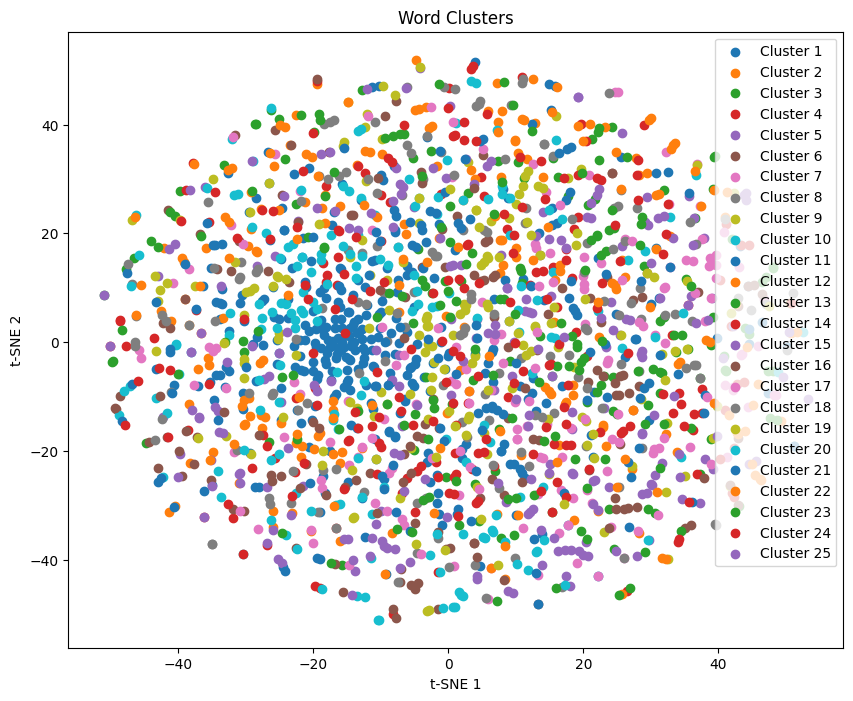

In [58]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
for i, label in enumerate(np.unique(labels)):
    plt.scatter(word_vectors_2d[labels == label, 0], word_vectors_2d[labels == label, 1], label=f'Cluster {i+1}')

plt.title('Word Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming word_vectors, labels, and processed_series are already defined

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a DataFrame for the data
df = pd.DataFrame({
    'x': word_vectors_2d[:, 0],
    'y': word_vectors_2d[:, 1],
    'label': [word for word, _ in word_aspects.items()],
    'cluster': labels
})

# Create the scatter plot with plotly
fig = go.Figure()

# Add data points
for i, label in enumerate(np.unique(labels)):
    cluster_df = df[df['cluster'] == label]
    fig.add_trace(go.Scatter(x=cluster_df['x'], y=cluster_df['y'],
                             mode='markers+text',
                             marker=dict(size=6),
                             hovertext=cluster_df['label'],
                             hoverinfo="text",  # Display custom text on hover,
                             name=f'Cluster {label+1}'))

# Update layout
fig.update_layout(title='Word Clusters',
                  xaxis_title='t-SNE 1',
                  yaxis_title='t-SNE 2')


fig.show()


/var/folders/p1/6w1txg1s1rj5tv4tp55vh74r0000gn/T/ipykernel_74051/1172497705.py:12: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/var/folders/p1/6w1txg1s1rj5tv4tp55vh74r0000gn/T/ipykernel_74051/1172497705.py:17: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



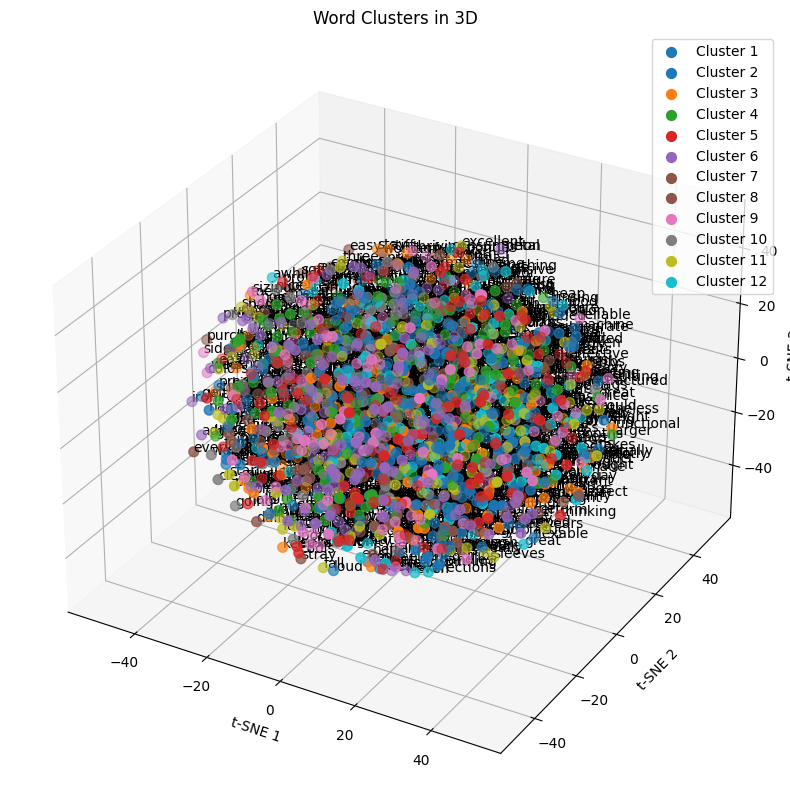

In [51]:
from mpl_toolkits.mplot3d import Axes3D

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=3, random_state=0)
word_vectors_3d = tsne.fit_transform(word_vectors)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get a colormap
colormap = plt.cm.get_cmap('tab10')

# Scatter plot for each cluster
for i, label in enumerate(np.unique(labels)):
    cluster_points = word_vectors_3d[labels == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], 
               c=colormap(i / len(np.unique(labels))), label=f'Cluster {label+1}', s=50)

# Annotate points with the corresponding words
words = [word for sentence in processed_series for word in sentence]
min_length = min(len(words), len(word_vectors_3d))
for i in range(min_length):
    ax.text(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2], words[i])

# Add labels and title
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
plt.title('Word Clusters in 3D')
plt.legend()

# Show the plot
plt.show()


In [52]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(word_vectors)
new_values = PCA_model.transform(word_vectors)

In [53]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (1715, 2)
[[ 0.25863356  0.1271008 ]
 [ 0.19334795 -0.1787717 ]
 [ 0.160372    0.10325156]
 ...
 [-0.13686151  0.04106337]
 [-0.25048784  0.09973052]
 [-0.06735979 -0.09571287]]


In [54]:
import plotly.graph_objects as go
import pandas as pd

# Assuming word_vectors, labels, and processed_series are already defined

import plotly.express as px
import pandas as pd

# Create a DataFrame for the data
df = pd.DataFrame({
    'x': new_values[:, 0],
    'y': new_values[:, 1],
    'label': [word for word, _ in word_aspects.items()],
    'cluster': labels
})

# Create the scatter plot with plotly
fig = px.scatter(df, x='x', y='y', hover_name='label')
# Create the scatter plot with plotly
fig = go.Figure()

# Add data points
for i, label in enumerate(np.unique(labels)):
    cluster_df = df[df['cluster'] == label]
    fig.add_trace(go.Scatter(x=cluster_df['x'], y=cluster_df['y'],
                             mode='markers+text',
                             marker=dict(size=6),
                             hovertext=cluster_df['label'],
                             hoverinfo="text",  # Display custom text on hover,
                             name=f'Cluster {label+1}'))

# Update layout
fig.update_layout(title='Word Clusters',
                  xaxis_title='PCA 1',
                  yaxis_title='PCA 2')

fig.show()

In [55]:
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

In [86]:
# Define model
dbscan_model = DBSCAN(eps=0.25, min_samples=1)

In [72]:
dbscan_model.fit(word_vectors)

DBSCAN(eps=0.25, min_samples=9)

In [87]:

dbscan_res = dbscan_model.fit_predict(word_vectors)

In [88]:
words=[word for word, _ in word_aspects.items()]
for word, label in zip(words, dbscan_res):
    print(f"Word: {word}")
    print(f"Label: {label}")
    print()

Word: easy
Label: 0

Word: great
Label: 0

Word: well
Label: 0

Word: use
Label: 0

Word: good
Label: 0

Word: like
Label: 0

Word: quality
Label: 0

Word: durable
Label: 0

Word: work
Label: 0

Word: one
Label: 0

Word: really
Label: 0

Word: also
Label: 0

Word: price
Label: 0

Word: time
Label: 0

Word: clean
Label: 0

Word: nice
Label: 0

Word: get
Label: 0

Word: product
Label: 0

Word: easily
Label: 0

Word: sturdy
Label: 0

Word: comfortable
Label: 0

Word: works
Label: 0

Word: water
Label: 0

Word: fit
Label: 0

Word: wash
Label: 0

Word: enough
Label: 0

Word: even
Label: 0

Word: bags
Label: 0

Word: strong
Label: 0

Word: would
Label: 0

Word: makes
Label: 0

Word: light
Label: 0

Word: hot
Label: 0

Word: hold
Label: 0

Word: size
Label: 0

Word: keep
Label: 0

Word: colors
Label: 0

Word: heavy
Label: 0

Word: bag
Label: 0

Word: keeps
Label: 0

Word: color
Label: 0

Word: beautiful
Label: 0

Word: quickly
Label: 0

Word: made
Label: 0

Word: super
Label: 0

Word: little


In [ ]:
words = [word for sentence in sentences for word in sentence]  # Adjust according to how you've stored your words
for word, cluster in zip(words, clusters):
    print(f"Word: {word}, Cluster: {cluster}")

In [62]:
from numpy import where
from numpy import unique
import matplotlib.pyplot as plot

In [65]:
# obtain all the unique clusters
dbscan_clstrs = unique(dbscan_res)


In [89]:
processed_series

0                        [settings, perfect, hair, types]
1                                        [lots, settings]
2                                [heating, element, died]
3                                  [also, diffuser, stay]
4                        [wo, stay, flys, see, one, work]
                              ...                        
1176                                 [top, longer, stays]
1177                      [unfortunately, one, lids, fit]
1178        [cheap, enough, husband, loses, one, wo, cry]
1179                                  [economical, price]
1180    [also, way, seal, drinking, hole, car, hit, bu...
Name: Reviews, Length: 1181, dtype: object

In [91]:
words=word_embeddings.index_to_key

In [92]:
words

['easy',
 'great',
 'well',
 'use',
 'good',
 'like',
 'quality',
 'durable',
 'work',
 'one',
 'really',
 'also',
 'price',
 'time',
 'clean',
 'nice',
 'get',
 'product',
 'easily',
 'sturdy',
 'comfortable',
 'works',
 'water',
 'fit',
 'wash',
 'enough',
 'even',
 'bags',
 'strong',
 'would',
 'makes',
 'light',
 'hot',
 'hold',
 'size',
 'keep',
 'colors',
 'heavy',
 'bag',
 'keeps',
 'color',
 'beautiful',
 'quickly',
 'made',
 'super',
 'little',
 'need',
 'fast',
 'iron',
 'paper',
 'still',
 'shower',
 'put',
 'bottle',
 'cold',
 'stay',
 'way',
 'excellent',
 'day',
 'love',
 'soft',
 'much',
 'looks',
 'thing',
 'months',
 'perfect',
 'broke',
 'long',
 'perfectly',
 'seems',
 'used',
 'carry',
 'handle',
 'pretty',
 'getting',
 'temperature',
 'weight',
 'fits',
 'fan',
 'tea',
 'set',
 'first',
 'clock',
 'smell',
 'quite',
 'two',
 'absorbent',
 'difficult',
 'working',
 'hand',
 'far',
 'strap',
 'never',
 'ever',
 'battery',
 'wish',
 'find',
 'coffee',
 'keyboard',
 't

In [93]:
parts_of_speech = nltk.pos_tag(words)
parts_of_speech

[('easy', 'JJ'),
 ('great', 'JJ'),
 ('well', 'RB'),
 ('use', 'RB'),
 ('good', 'JJ'),
 ('like', 'IN'),
 ('quality', 'NN'),
 ('durable', 'JJ'),
 ('work', 'NN'),
 ('one', 'CD'),
 ('really', 'RB'),
 ('also', 'RB'),
 ('price', 'NN'),
 ('time', 'NN'),
 ('clean', 'JJ'),
 ('nice', 'JJ'),
 ('get', 'VB'),
 ('product', 'NN'),
 ('easily', 'RB'),
 ('sturdy', 'JJ'),
 ('comfortable', 'JJ'),
 ('works', 'NNS'),
 ('water', 'NN'),
 ('fit', 'VBP'),
 ('wash', 'NN'),
 ('enough', 'RB'),
 ('even', 'RB'),
 ('bags', 'NNS'),
 ('strong', 'JJ'),
 ('would', 'MD'),
 ('makes', 'VBZ'),
 ('light', 'JJ'),
 ('hot', 'JJ'),
 ('hold', 'NN'),
 ('size', 'NN'),
 ('keep', 'JJ'),
 ('colors', 'NNS'),
 ('heavy', 'JJ'),
 ('bag', 'NNS'),
 ('keeps', 'VBZ'),
 ('color', 'NN'),
 ('beautiful', 'JJ'),
 ('quickly', 'RB'),
 ('made', 'VBD'),
 ('super', 'JJ'),
 ('little', 'JJ'),
 ('need', 'NN'),
 ('fast', 'RB'),
 ('iron', 'JJ'),
 ('paper', 'NN'),
 ('still', 'RB'),
 ('shower', 'VBZ'),
 ('put', 'VBN'),
 ('bottle', 'RP'),
 ('cold', 'JJ'),
 ('sta

In [94]:
nouns = list(filter(lambda x: x[1] == "NN", parts_of_speech))
nouns

[('quality', 'NN'),
 ('work', 'NN'),
 ('price', 'NN'),
 ('time', 'NN'),
 ('product', 'NN'),
 ('water', 'NN'),
 ('wash', 'NN'),
 ('hold', 'NN'),
 ('size', 'NN'),
 ('color', 'NN'),
 ('need', 'NN'),
 ('paper', 'NN'),
 ('stay', 'NN'),
 ('way', 'NN'),
 ('day', 'NN'),
 ('thing', 'NN'),
 ('carry', 'NN'),
 ('temperature', 'NN'),
 ('fan', 'NN'),
 ('tea', 'NN'),
 ('clock', 'NN'),
 ('smell', 'NN'),
 ('hand', 'NN'),
 ('strap', 'NN'),
 ('keyboard', 'NN'),
 ('job', 'NN'),
 ('bit', 'NN'),
 ('lot', 'NN'),
 ('notebook', 'NN'),
 ('side', 'NN'),
 ('car', 'NN'),
 ('cup', 'NN'),
 ('money', 'NN'),
 ('machine', 'NN'),
 ('metal', 'NN'),
 ('charge', 'NN'),
 ('stuck', 'NN'),
 ('feel', 'NN'),
 ('switch', 'NN'),
 ('low', 'NN'),
 ('shape', 'NN'),
 ('amount', 'NN'),
 ('place', 'NN'),
 ('cleaning', 'NN'),
 ('button', 'NN'),
 ('problem', 'NN'),
 ('year', 'NN'),
 ('flow', 'NN'),
 ('ink', 'NN'),
 ('power', 'NN'),
 ('keys', 'NN'),
 ('food', 'NN'),
 ('road', 'NN'),
 ('fall', 'NN'),
 ('watch', 'NN'),
 ('throw', 'NN'),
 ('